In [47]:
import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
from sklearn.covariance import GraphicalLassoCV
import numpy.linalg as la

In [4]:
pX = pd.read_csv('prostate/prostate.csv')
pY = pX.iloc[:,-1]
pX = np.array(pX.iloc[:,1:6034])

In [5]:
shuf = np.arange(pX.shape[0])
rd.shuffle(shuf)

In [6]:
start = [0, 20, 40, 60, 80]
end = [20, 40, 60, 80, 102]

In [7]:
def chatterjee(x,y):
    n=len(x)
    df=pd.DataFrame({'X':x,'Y':y})
    df['rank_x']=df['X'].rank()
    df['rank_y']=df['Y'].rank()
    df=df.sort_values(by='rank_x')
    sum_term1=df['rank_y'].diff().abs().sum()
    sum_term2=((df['rank_y']-1)*(n+1-df['rank_y'])).sum()
    #return 1-(n*sum_term1)/(2*sum_term2)
    return (1-3*sum_term1/(pow(n,2)-1))

In [8]:
cor=np.zeros(6033)
for i in range(6033):
    temp_x=pX[:,i]
    cor[i]=chatterjee(temp_x,pY)
index = np.argsort(-cor)

In [9]:
n_feature = 20
pX_rem = pX[:,index[0:n_feature]]

### Logistic Regression

Text(0.5, 1.0, 'ROC Curve of Logistic Regression(Significant Variable Included)')

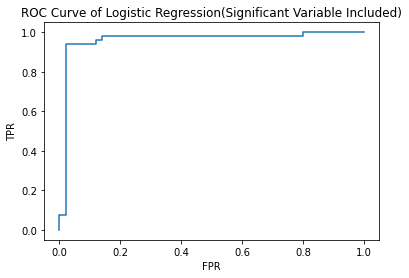

In [35]:
prob = np.zeros(pY.shape[0])
for i in range(5):
    test_X = pX_rem[shuf[start[i]:end[i]],:]
    test_Y = pY[shuf[start[i]:end[i]]]
    train_ind = np.setdiff1d(np.arange(pX.shape[0]),shuf[start[i]:end[i]])
    train_X = pX_rem[train_ind,:]
    train_Y = pY[train_ind]
    
    model = LogisticRegression(solver='liblinear')
    model.fit(train_X, train_Y)
    
    proba_res = model.predict_proba(test_X)
    prob[shuf[start[i]:end[i]]] = proba_res[:,1] - proba_res[:,0]

fpr1, tpr1, thresholds = roc_curve(pY, prob, pos_label = 1)
plt.plot(fpr1, tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Logistic Regression(Significant Variable Included)')

### L1-Penalized Logistic Regression

Text(0.5, 1.0, 'ROC Curve of Logistic Regression(Significant Variable Included)')

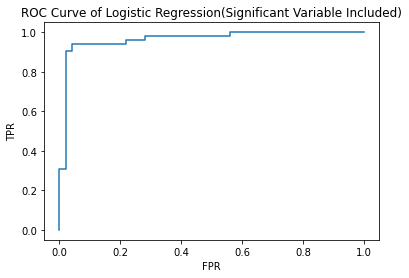

In [36]:
prob = np.zeros(pY.shape[0])
for i in range(5):
    test_X = pX_rem[shuf[start[i]:end[i]],:]
    test_Y = pY[shuf[start[i]:end[i]]]
    train_ind = np.setdiff1d(np.arange(pX.shape[0]),shuf[start[i]:end[i]])
    train_X = pX_rem[train_ind,:]
    train_Y = pY[train_ind]
    
    model = LogisticRegression(solver='liblinear', penalty='l1')
    model.fit(train_X, train_Y)
    
    proba_res = model.predict_proba(test_X)
    prob[shuf[start[i]:end[i]]] = proba_res[:,1] - proba_res[:,0]

fpr2, tpr2, thresholds = roc_curve(pY, prob, pos_label = 1)
plt.plot(fpr2, tpr2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Logistic Regression(Significant Variable Included)')

### L2-Penalized Logistic Regression

Text(0.5, 1.0, 'ROC Curve of Logistic Regression(Significant Variable Included)')

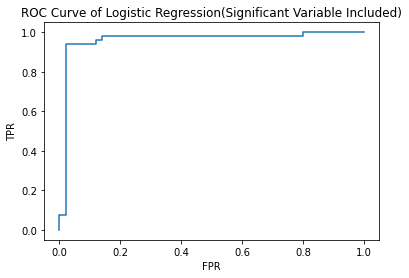

In [37]:
prob = np.zeros(pY.shape[0])
for i in range(5):
    test_X = pX_rem[shuf[start[i]:end[i]],:]
    test_Y = pY[shuf[start[i]:end[i]]]
    train_ind = np.setdiff1d(np.arange(pX.shape[0]),shuf[start[i]:end[i]])
    train_X = pX_rem[train_ind,:]
    train_Y = pY[train_ind]
    
    model = LogisticRegression(solver='liblinear', penalty='l2')
    model.fit(train_X, train_Y)
    
    proba_res = model.predict_proba(test_X)
    prob[shuf[start[i]:end[i]]] = proba_res[:,1] - proba_res[:,0]

fpr3, tpr3, thresholds = roc_curve(pY, prob, pos_label = 1)
plt.plot(fpr3, tpr3)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Logistic Regression(Significant Variable Included)')

### Neural Network

3/3 [==============================] - 0s 997us/step - loss: 0.6234


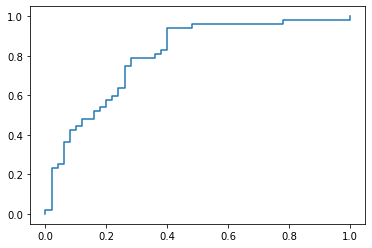

In [31]:
prob = np.zeros(pY.shape[0])
for i in range(5):
    test_X = pX_rem[shuf[start[i]:end[i]],:]
    test_Y = pY[shuf[start[i]:end[i]]]
    train_ind = np.setdiff1d(np.arange(pX.shape[0]),shuf[start[i]:end[i]])
    train_X = pX_rem[train_ind,:]
    train_Y = pY[train_ind]
    
    inputs_2 = keras.Input(shape=(n_feature))
    act_2 = 'tanh'
    x_2 = layers.Dense(units=100, activation=act_2)(inputs_2)
    #x_2 = layers.Dense(units=10, activation=act_2)(x_2)
    x_2 = layers.Dense(units=50, activation=act_2)(x_2)
    x_2 = layers.Dense(units=20, activation=act_2)(x_2)
    x_2 = layers.Dense(units=10, activation=act_2)(x_2)
    outputs_2 = layers.Dense(units=1, activation="sigmoid")(x_2)
    model = keras.Model(inputs=inputs_2, outputs=outputs_2)
    model.compile(optimizer="adamax", loss="binary_crossentropy")
    model.fit(train_X, train_Y, epochs=1)
    prob[shuf[start[i]:end[i]]] = model.predict(test_X).flatten()

fpr4, tpr4, thresholds = roc_curve(pY, prob, pos_label = 1)
plt.plot(fpr4, tpr4)

### Graphical LASSO & QDA

In [38]:
indices = np.array([i for i in range(102)])
pos_ind = indices[pY==1]
neg_ind = indices[pY==0]

pos_X = pX_rem[pos_ind,:]
neg_X = pX_rem[neg_ind,:]

In [39]:
pos_means = pos_X.mean(axis=0)
neg_means = neg_X.mean(axis=0)
pos_X -= pos_means
neg_X -= neg_means

In [43]:
model1=GraphicalLassoCV(n_jobs=-1)
model1.fit(pos_X)

D:\Anaconda\envs\learn\lib\site-packages\numpy\core\_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


GraphicalLassoCV(n_jobs=-1)

In [44]:
model2=GraphicalLassoCV(n_jobs=-1)
model2.fit(neg_X)

D:\Anaconda\envs\learn\lib\site-packages\numpy\core\_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


GraphicalLassoCV(n_jobs=-1)

In [45]:
K1 = model1.precision_
K2 = model2.precision_

In [48]:
def crit(x):
    return (x-pos_means)@K1@(x-pos_means).T-np.log(la.det(K1))-(x-neg_means)@K2@(x-neg_means).T+np.log(la.det(K2))
crit_result=np.apply_along_axis(crit,1, pX_rem)

Text(0.5, 1.0, 'ROC Curve of Logistic Regression(Significant Variable Included)')

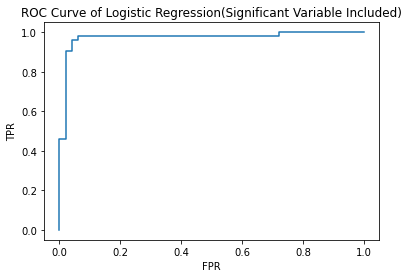

In [49]:
fpr5, tpr5, thresholds = roc_curve(pY, -crit_result, pos_label = 1)
plt.plot(fpr5, tpr5)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of Logistic Regression(Significant Variable Included)')

### ROC Curves for Model Creation

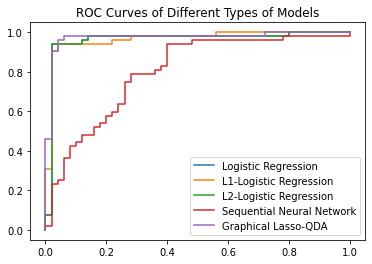

In [51]:
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='L1-Logistic Regression')
plt.plot(fpr3, tpr3, label='L2-Logistic Regression')
plt.plot(fpr4, tpr4, label='Sequential Neural Network')
plt.plot(fpr5, tpr5, label='Graphical Lasso-QDA')
plt.legend()
plt.title('ROC Curves of Different Types of Models')
plt.show()